using different slgorithms need to predict whether a person
makes over 50K per year or not from classic adult dataset using XGBoost.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

In [3]:
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

In [4]:
df = pd.read_csv(url,names=columns)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Feature Engineering


In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [9]:
df.replace(' ?',np.nan,inplace=True)


In [10]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [11]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [12]:
#### Salary
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

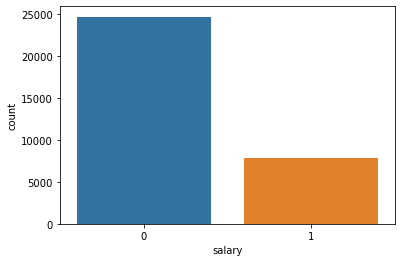

In [13]:
df = df.replace({' <=50K':0,' >50K':1})
sns.countplot(df['salary'])


In [14]:
df['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [15]:
### Workclass

df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [16]:
df['workclass'].value_counts()


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [17]:
df= df.replace(' Without-pay', ' Never-worked')

In [18]:
df['workclass'].value_counts()


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Never-worked           21
Name: workclass, dtype: int64

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Never-worked')])

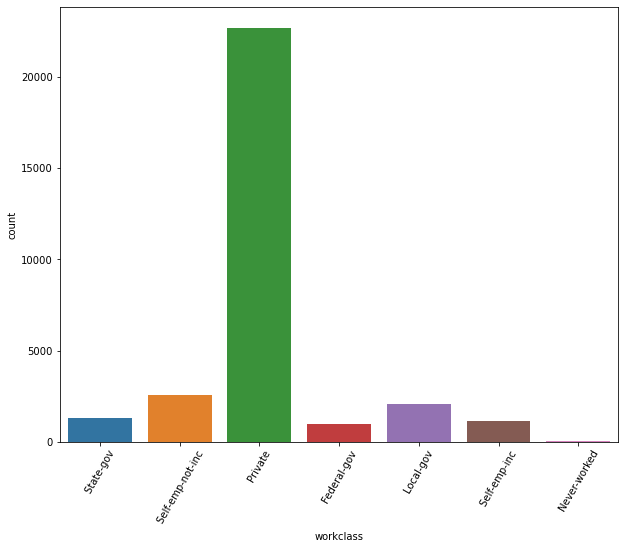

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)

In [20]:
df['workclass'].fillna('0',inplace=True)


C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, '0'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Never-worked')])

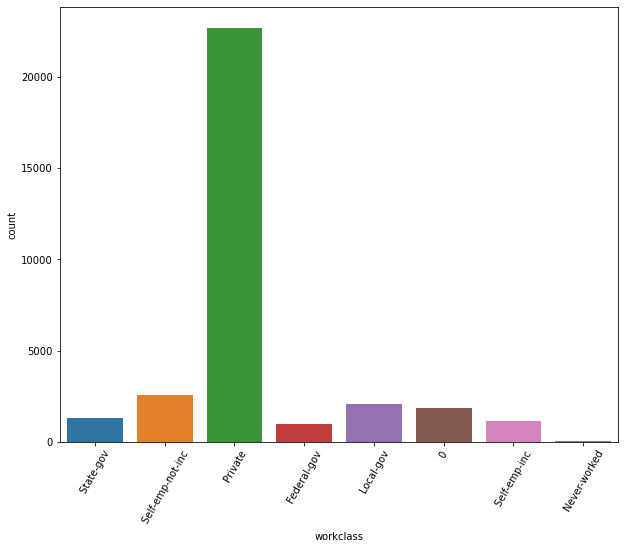

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)

In [22]:
#### Fnlwgt

df['fnlwgt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [23]:
df['fnlwgt'] = df['fnlwgt'].apply(lambda x :np.log1p(x))

df['fnlwgt'].describe()

count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlwgt, dtype: float64

In [24]:
#### Education

df['education'].value_counts()


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

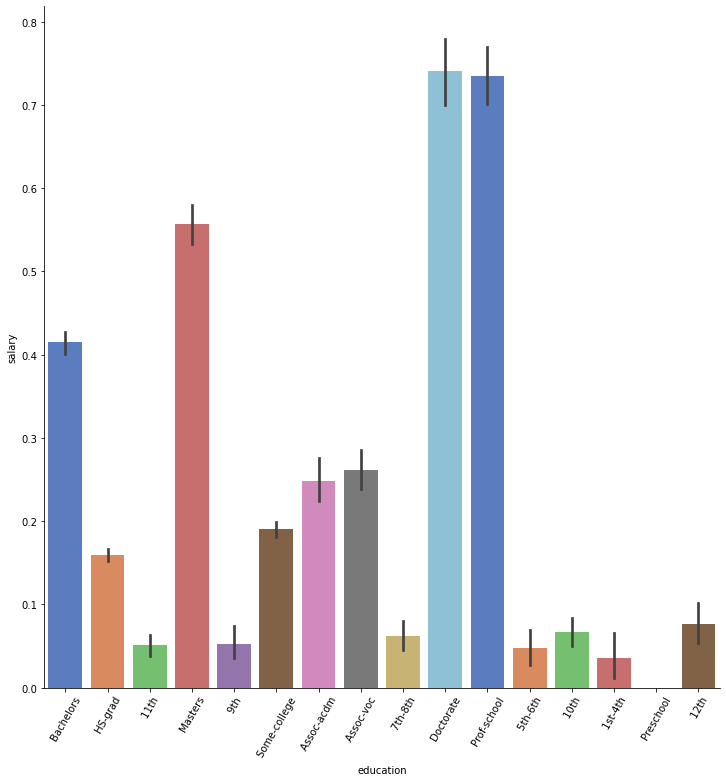

In [25]:
sns.catplot(x='education',y='salary',data=df,height=10,palette='muted',kind='bar')
plt.xticks(rotation=60)

In [26]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return 'Primary'
    else:
        return x

In [27]:
df['education'] = df['education'].apply(primary)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, 'Primary'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' Some-college'),
  Text(5, 0, ' Assoc-acdm'),
  Text(6, 0, ' Assoc-voc'),
  Text(7, 0, ' Doctorate'),
  Text(8, 0, ' Prof-school'),
  Text(9, 0, ' Preschool')])

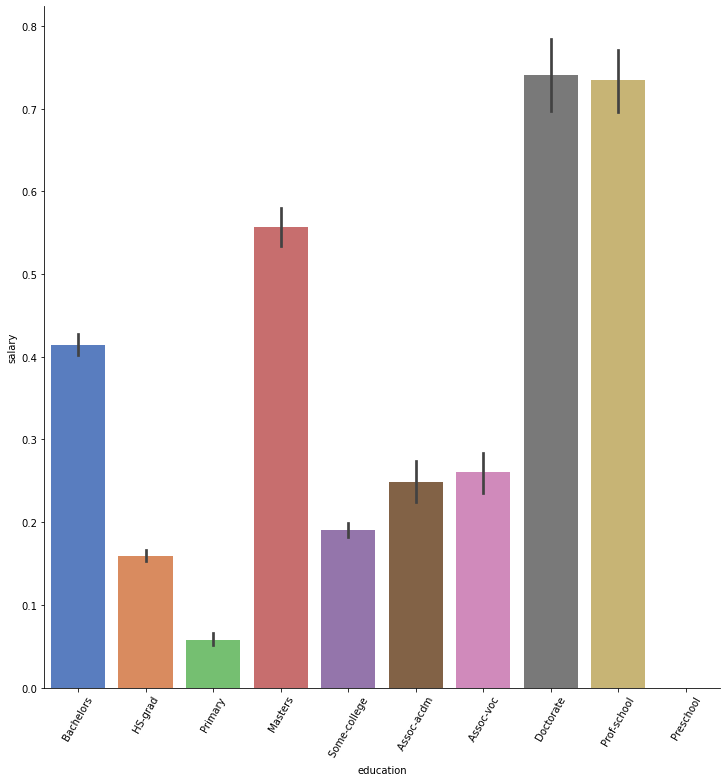

In [28]:
sns.catplot(x='education',y='salary',data=df,height=10,palette='muted',kind='bar')
plt.xticks(rotation=60)

In [29]:
###### Marrital Status

df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [30]:
df['marital-status'].replace(' Married-AF-spouse', ' Married-civ-spouse',inplace=True)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Never-married'),
  Text(1, 0, ' Married-civ-spouse'),
  Text(2, 0, ' Divorced'),
  Text(3, 0, ' Married-spouse-absent'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Widowed')])

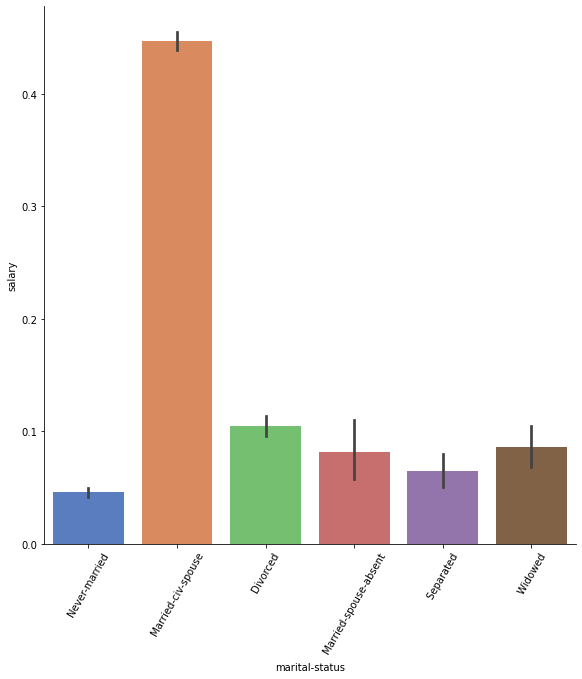

In [31]:
sns.catplot(x='marital-status',y='salary',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

In [32]:
#### Occupation 

df['occupation'].fillna('0',inplace=True)

df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
0                     1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [33]:
df['occupation'].replace(' Armed-Forces','0',inplace=True)

df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
0                     1852
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
Name: occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, '0'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Priv-house-serv')])

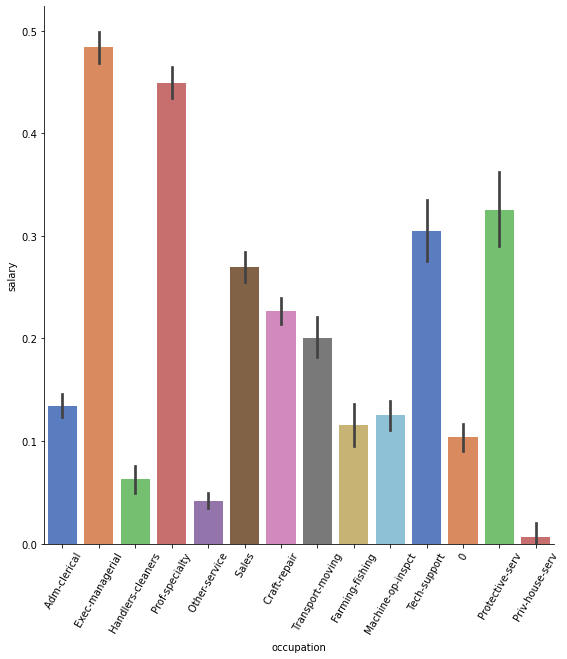

In [34]:
sns.catplot(x='occupation',y='salary',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

In [35]:
#### Relationship

df['relationship'].value_counts()


 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [36]:
#### Race

df['race'].value_counts()


 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [37]:
#### Sex

df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [38]:
#### Native_Country

df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [39]:
def native(country):
    if country in [' United-States',' Canada']:
        return 'North_America'
    elif country in [' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Dominican-Republic',' Guatemala',' Haiti',' Nicaragua',' Trinadad&Tobago',' Honduras']:
        return 'Central_America' 
    elif country in [' Mexico',' Columbia',' Vietnam',' Peru',' Ecuador',' South',' Outlying-US(Guam-USVI-etc)']:
        return 'South_America'
    elif country in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',' Holand-Netherlands']:
        return 'EU'
    elif country in [' India',' Iran',' China',' Japan',' Thailand',' Hong',' Cambodia',' Laos',' Philippines',' Taiwan']:
        return 'Asian'
    else:
        return country

In [40]:
df['native-country'] = df['native-country'].apply(native)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'North_America'),
  Text(1, 0, 'Central_America'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'South_America'),
  Text(4, 0, 'EU')])

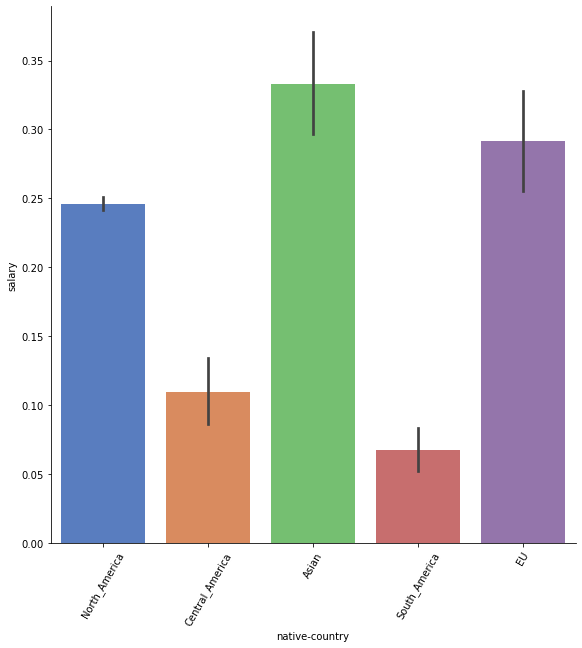

In [41]:
sns.catplot(x='native-country',y='salary',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

<AxesSubplot:>

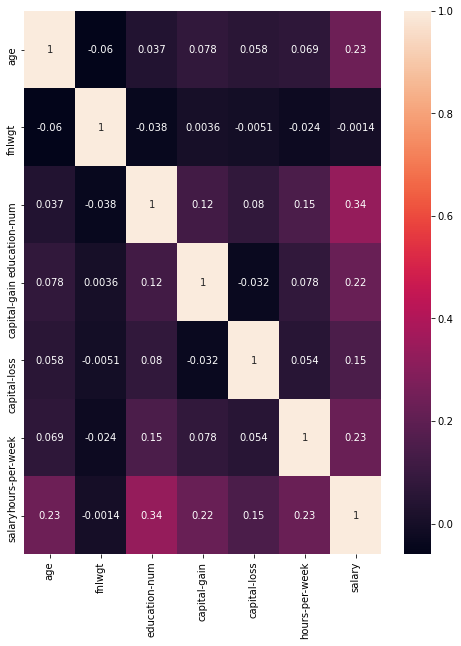

In [42]:
##### Let's check our data's correlation with the help of Heatmap

corr =df.corr()
plt.figure(figsize=(8,10))
sns.heatmap(corr, annot=True)

##### As we can see that corr values of fnlwgt are very low, Hence we can drop it safely.

In [43]:
df.drop('fnlwgt',axis=1,inplace=True)
df.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North_America,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,North_America,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North_America,0
3,53,Private,Primary,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,North_America,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Central_America,0


#### Dividing Data into 'X' and 'y'



In [44]:
X = df.drop('salary',axis=1)
y = df['salary']

In [45]:
X.columns


Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [46]:
X_d = pd.get_dummies(X)

In [47]:
X_d.head()


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_Asian,native-country_Central_America,native-country_EU,native-country_North_America,native-country_South_America
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
3,53,7,0,0,40,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,28,13,0,0,40,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0


#### Train_Test_Split

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_d,y,test_size=0.3,random_state=101)

In [49]:
print(x_train.shape)
print(y_train.shape
)

(22792, 61)
(22792,)


###### On Applying Algorithms & Evaluating the Models


###### 1. Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(x_train,y_train)

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
#### Applying Hyperparams for LogReg model to get best model score

penalty = ['l1', 'l2']
# C is the inverese of regularization parameter
C = np.logspace(0, 4, 10)
random_state=[0]
# creating a dictionary of hyperparameters
hyperparameters = dict(C=C, penalty=penalty, 
                  random_state=random_state)

In [52]:
#### GridSearchCV for LogReg

from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(Lr,param_grid=hyperparameters,cv=5,verbose=3,n_jobs=-1)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.4s finished
C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'random_state': [0]},
             verbose=3)

In [53]:
gsv.best_params_

{'C': 7.742636826811269, 'penalty': 'l2', 'random_state': 0}

In [54]:
lr_tuned = LogisticRegression(C=1.0,penalty='l2',random_state=0)

In [55]:
lr_tuned.fit(x_train,y_train)


C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [56]:
Log_Reg =lr_tuned.score(x_test,y_test)

In [57]:
lr_y_pred = lr_tuned.predict(x_test)

In [58]:
#### Ligistic regression Model Evaluation

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc
print(f"Accuracy_Score:{accuracy_score(y_test,lr_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,lr_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,lr_y_pred)}")

Accuracy_Score:0.8295629030607022
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.86      0.92      0.89      7436
           1       0.68      0.53      0.60      2333

    accuracy                           0.83      9769
   macro avg       0.77      0.73      0.75      9769
weighted avg       0.82      0.83      0.82      9769

**************************************************
Confusion_Matrix:[[6857  579]
 [1086 1247]]


#### Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

###### Applying grid_params with GridsearchCv for DTC model to get best model score

In [66]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,2),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [67]:
gsv = GridSearchCV(dtc,param_grid=grid_param,cv=5,verbose=3,n_jobs=-1)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=3)

In [68]:
gsv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'best'}

In [69]:
dtc_tuned = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=6,min_samples_split=2,splitter='best')

In [70]:
dtc_tuned.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=6)

In [71]:
Dtc = dtc_tuned.score(x_test,y_test)

##### Decision Tree Classifier Model Evaluation


In [72]:
dtc_y_pred = dtc_tuned.predict(x_test)

In [73]:
print(f"Accuracy_Score:{accuracy_score(y_test,dtc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,dtc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,dtc_y_pred)}")

Accuracy_Score:0.8591462790459617
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7436
           1       0.77      0.58      0.66      2333

    accuracy                           0.86      9769
   macro avg       0.83      0.76      0.79      9769
weighted avg       0.85      0.86      0.85      9769

**************************************************
Confusion_Matrix:[[7043  393]
 [ 983 1350]]


#### 3. Random Forest Classifier


In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [75]:
#### Applying grid_params with GridsearchCv for RFC model to get best model score

grid_params = {"n_estimators" : [10,15,25,30],
              "max_depth" : range(1,10,2),
              "min_samples_leaf" : range(1,10,1),
              "min_samples_split" : range(2,10,1),
              "max_features" : ['auto','log2']
              }

In [76]:
gsv = GridSearchCV(rfc,param_grid=grid_params,cv=5,n_jobs=-1,verbose=3)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10, 2),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [10, 15, 25, 30]},
             verbose=3)

In [78]:
gsv.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 30}

In [79]:
rfc_tuned = RandomForestClassifier(max_depth=9,max_features='auto',min_samples_leaf=1,min_samples_split=6,n_estimators=30)


In [80]:
rfc_tuned.fit(x_train,y_train)


RandomForestClassifier(max_depth=9, min_samples_split=6, n_estimators=30)

In [81]:
RFC = rfc_tuned.score(x_test,y_test)


In [82]:
##### RandomForest Classifier Model Evaluation


rfc_y_pred = rfc_tuned.predict(x_test)


In [83]:
print(f"Accuracy_Score:{accuracy_score(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,rfc_y_pred)}")


Accuracy_Score:0.8611935715016891
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7436
           1       0.80      0.56      0.66      2333

    accuracy                           0.86      9769
   macro avg       0.84      0.76      0.79      9769
weighted avg       0.86      0.86      0.85      9769

**************************************************
Confusion_Matrix:[[7104  332]
 [1024 1309]]


In [ ]:
4. KNN Classifier




In [84]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)


KNeighborsClassifier()

In [85]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,25,27,30],
               'n_neighbors' : [3,7,9,11]
              }

In [86]:
gsv = GridSearchCV(knc,param_grid=param_grid,verbose=3)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.832, total=   5.5s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.839, total=   5.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.4s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.839, total=   5.5s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.833, total=   5.6s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.833, total=   5.2s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.838, total=   5.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.842, total=   5.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.840, total=   5.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.842, total= 

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.844, total=   5.1s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.845, total=   5.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.841, total=   5.1s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.847, total=   5.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, score=0.832, total=   4.8s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, score=0.839, total=   4.8s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, score=0.839, tot

[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.843, total=   3.8s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.843, total=   3.7s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.844, total=   3.7s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.844, total=   3.8s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.844, total=   3.6s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=11, score=0.842, total=   3.9s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=11, score=0.846, total=   3.7s
[CV] 

[CV]  algorithm=brute, leaf_size=18, n_neighbors=3, score=0.833, total=   2.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.839, total=   2.5s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.841, total=   2.5s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.840, total=   2.4s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.843, total=   2.5s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.840, total=   2.6s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.842, total=   2.5s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=27, n_neighbors=11, score=0.845, total=   2.6s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.831, total=   2.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.838, total=   2.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.839, total=   2.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.835, total=   2.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.833, total=   2.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, score=0.839, total=   2.5s
[CV] algorithm=brute

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 14.8min finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 25, 27, 30],
                         'n_neighbors': [3, 7, 9, 11]},
             verbose=3)

In [87]:
gsv.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 18, 'n_neighbors': 11}

In [88]:
knc_tuned = KNeighborsClassifier(algorithm='kd_tree',leaf_size=18,n_neighbors=11)
knc_tuned.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=18, n_neighbors=11)

In [89]:
KNN = knc_tuned.score(x_test,y_test)

In [90]:
knc_y_pred = knc_tuned.predict(x_test)

In [91]:
#### KNN Classifier Model Evaluation

print(f"Accuracy_Score:{accuracy_score(y_test,knc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,knc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,knc_y_pred)}")

Accuracy_Score:0.8523902139420616
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7436
           1       0.72      0.63      0.67      2333

    accuracy                           0.85      9769
   macro avg       0.80      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769

**************************************************
Confusion_Matrix:[[6852  584]
 [ 858 1475]]


#### 5. XGBoost Classifier


In [97]:
from xgboost import XGBClassifier
xbc = XGBClassifier()
xbc.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [98]:
param_grid={
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,7,9,11,15],
    'n_estimators':[10,50,100,200,300]   
}

In [99]:
gsv = GridSearchCV(xbc,param_grid=param_grid,verbose=3)
gsv.fit(x_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................


C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rat

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=1, max_depth=3, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=200 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=300 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=300 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=300 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=300 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=300 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=300, score=nan, total=   0.1s
[CV]  learning

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=1, max_depth=5, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=5, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=5, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=5, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=5, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=5, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=5, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=5, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=5, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=5, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=5, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=5, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=5, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=1, max_depth=5, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=5, n_estimators=200 .................
[CV]   learning_rate=1, max_depth=5, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=5, n_estimators=200 .................
[CV]   learning_rate=1, max_depth=5, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=5, n_estimators=200 .................
[CV]   learning_rate=1, max_depth=5, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=5, n_estimators=300 .................
[CV]   learning_rate=1, max_depth=5, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=5, n_estimators=300 .................
[CV]   learning_rate=1, max_depth=5, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=5, n_estimators=300 .................
[CV]   learning_rate=1, max_depth=5, n_estimators=300, score=nan, total=   0.1s
[CV]  learning

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=1, max_depth=7, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=7, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=7, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=7, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=7, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=7, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=7, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=7, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=7, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=7, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=7, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=7, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=7, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=1, max_depth=7, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=7, n_estimators=200 .................
[CV]   learning_rate=1, max_depth=7, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=7, n_estimators=200 .................
[CV]   learning_rate=1, max_depth=7, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=7, n_estimators=200 .................
[CV]   learning_rate=1, max_depth=7, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=7, n_estimators=200 .................
[CV]   learning_rate=1, max_depth=7, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=7, n_estimators=300 .................
[CV]   learning_rate=1, max_depth=7, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=7, n_estimators=300 .................
[CV]   learning_rate=1, max_depth=7, n_estimators=300, score=nan, total=   0.1s
[CV]  learning

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=1, max_depth=9, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=9, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=9, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=9, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=9, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=9, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=9, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=9, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=9, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=9, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=9, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=9, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=9, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=1, max_depth=9, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=9, n_estimators=200 .................
[CV]   learning_rate=1, max_depth=9, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=9, n_estimators=200 .................
[CV]   learning_rate=1, max_depth=9, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=9, n_estimators=200 .................
[CV]   learning_rate=1, max_depth=9, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=9, n_estimators=200 .................
[CV]   learning_rate=1, max_depth=9, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=9, n_estimators=200 .................
[CV]   learning_rate=1, max_depth=9, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=9, n_estimators=300 .................
[CV]   learning_rate=1, max_depth=9, n_estimators=300, score=nan, total=   0.1s
[CV]  learning

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=1, max_depth=11, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=11, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=11, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=11, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=11, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=11, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=11, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=11, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=11, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=11, n_estimators=50 .................
[CV]   learning_rate=1, max_depth=11, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=11, n_estimators=50 .................
[CV]   learning_rate=1, max_depth=11, n_estimators=50, score=nan, total=   0.1s
[CV]  learning

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=1, max_depth=11, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=11, n_estimators=100 ................
[CV]   learning_rate=1, max_depth=11, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=11, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=11, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=11, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=11, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=11, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=11, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=11, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=11, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=11, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=11, n_estimators=200, score=nan, total=   0.1s
[CV]  l

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=1, max_depth=11, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=15, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=15, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=15, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=15, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=15, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=15, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=15, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=15, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=15, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=15, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=15, n_estimators=50 .................
[CV]   learning_rate=1, max_depth=15, n_estimators=50, score=nan, total=   0.1s
[CV]  learnin

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=1, max_depth=15, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=15, n_estimators=100 ................
[CV]   learning_rate=1, max_depth=15, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=15, n_estimators=100 ................
[CV]   learning_rate=1, max_depth=15, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=15, n_estimators=100 ................
[CV]   learning_rate=1, max_depth=15, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=15, n_estimators=100 ................
[CV]   learning_rate=1, max_depth=15, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=15, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=15, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=15, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=15, n_estimators=200, score=nan, total=   0.1s
[CV]  l

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=1, max_depth=15, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=15, n_estimators=300 ................
[CV]   learning_rate=1, max_depth=15, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=1, max_depth=15, n_estimators=300 ................
[CV]   learning_rate=1, max_depth=15, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10 ................
[CV]   learning_rate=0.5, max_depth=3, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10 ................
[CV]   learning_rate=0.5, max_depth=3, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10 ................
[CV]   learning_rate=0.5, max_depth=3, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10 ................
[CV]   learning_rate=0.5, max_depth=3, n_estimators=10, score=nan, total=   0.1s
[CV]  l

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.5, max_depth=3, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.5, max_depth=3, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=100, score=nan, total=   0.1s
[C

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.5, max_depth=3, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=300 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=300 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=300 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=300 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=300 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=10 ................
[CV]   learning_rate=0.5, max_depth=5, n_estimators=10, score=nan, total=   0.1s
[

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.5, max_depth=5, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50 ................
[CV]   learning_rate=0.5, max_depth=5, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50 ................
[CV]   learning_rate=0.5, max_depth=5, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50 ................
[CV]   learning_rate=0.5, max_depth=5, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=nan, total=   0.1s
[CV]

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.5, max_depth=5, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=300 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=300 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=300 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=300 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=300 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=300, score=nan, total=   0.1s


C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users


[CV]   learning_rate=0.5, max_depth=7, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=7, n_estimators=50 ................
[CV]   learning_rate=0.5, max_depth=7, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=7, n_estimators=50 ................
[CV]   learning_rate=0.5, max_depth=7, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=7, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=7, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=7, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=7, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=7, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=7, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=7, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=7, n_estimators=100, score=nan, total=   0.1s
[C

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.5, max_depth=7, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=7, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=7, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=7, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=7, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=7, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=7, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=7, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=7, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=7, n_estimators=300 ...............
[CV]   learning_rate=0.5, max_depth=7, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=7, n_estimators=300 ...............
[CV]   learning_rate=0.5, max_depth=7, n_estimators=300, score=nan, total=   0.1s


C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.5, max_depth=9, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=9, n_estimators=10 ................
[CV]   learning_rate=0.5, max_depth=9, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=9, n_estimators=10 ................
[CV]   learning_rate=0.5, max_depth=9, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=9, n_estimators=10 ................
[CV]   learning_rate=0.5, max_depth=9, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=9, n_estimators=50 ................
[CV]   learning_rate=0.5, max_depth=9, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=9, n_estimators=50 ................
[CV]   learning_rate=0.5, max_depth=9, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=9, n_estimators=50 ................
[CV]   learning_rate=0.5, max_depth=9, n_estimators=50, score=nan, total=   0.1s
[CV]  l

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.5, max_depth=9, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=9, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=9, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=9, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=9, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=9, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=9, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=9, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=9, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=9, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=9, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=9, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=9, n_estimators=200, score=nan, total=   0.1s


C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.5, max_depth=11, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=10 ...............
[CV]   learning_rate=0.5, max_depth=11, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=10 ...............
[CV]   learning_rate=0.5, max_depth=11, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=50 ...............
[CV]   learning_rate=0.5, max_depth=11, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=50 ...............
[CV]   learning_rate=0.5, max_depth=11, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=50 ...............
[CV]   learning_rate=0.5, max_depth=11, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=50 ...............
[CV]   learning_rate=0.5, max_depth=11, n_estimators=50, score=nan, total=   0.1s


C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.5, max_depth=11, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=200 ..............
[CV]   learning_rate=0.5, max_depth=11, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=200 ..............
[CV]   learning_rate=0.5, max_depth=11, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=200 ..............
[CV]   learning_rate=0.5, max_depth=11, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=200 ..............
[CV]   learning_rate=0.5, max_depth=11, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=200 ..............
[CV]   learning_rate=0.5, max_depth=11, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=300 ..............
[CV]   learning_rate=0.5, max_depth=11, n_estimators=300, score=nan, total= 

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.5, max_depth=11, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=300 ..............
[CV]   learning_rate=0.5, max_depth=11, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=10 ...............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=10 ...............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=10 ...............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=10 ...............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=10 ...............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=10, score=nan, total=   0.1

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.5, max_depth=15, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=100 ..............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=100 ..............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=100 ..............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=100 ..............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=100 ..............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=200 ..............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=200, score=nan, total=  

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.5, max_depth=15, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=300 ..............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=300 ..............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=300 ..............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=300 ..............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=10, score=nan, total=   0.

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users


[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=nan, total=   0.1s
[

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.1, max_depth=3, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=300, score=nan, total=   0.1s


C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.1, max_depth=5, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=nan, total=   0.1s
[CV]  l

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.1, max_depth=5, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=200, score=nan, total=   0.1s


C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.1, max_depth=5, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=300 ...............
[CV]   learning_rate=0.1, max_depth=5, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=7, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=7, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=7, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=7, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=7, n_estimators=10, score=nan, total=   0.1s
[CV] 

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users


[CV]   learning_rate=0.1, max_depth=7, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=7, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=7, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=7, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=7, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=7, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=7, n_estimators=200, score=nan, total=   0.1s

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.1, max_depth=7, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=300 ...............
[CV]   learning_rate=0.1, max_depth=7, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=300 ...............
[CV]   learning_rate=0.1, max_depth=7, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=9, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=9, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=9, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=9, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=9, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=9, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=9, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=9, n_estimators=10, score=nan, total=   0.1s
[CV]

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.1, max_depth=9, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=9, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=9, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=9, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=9, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=9, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=9, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=9, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=9, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=9, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=9, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=9, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=9, n_estimators=200, score=nan, total=   0.1s
[

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users


[CV]   learning_rate=0.1, max_depth=9, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=9, n_estimators=300 ...............
[CV]   learning_rate=0.1, max_depth=9, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=9, n_estimators=300 ...............
[CV]   learning_rate=0.1, max_depth=9, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=9, n_estimators=300 ...............
[CV]   learning_rate=0.1, max_depth=9, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=10 ...............
[CV]   learning_rate=0.1, max_depth=11, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=10 ...............
[CV]   learning_rate=0.1, max_depth=11, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=10 ...............
[CV]   learning_rate=0.1, max_depth=11, n_estimators=10, score=nan, total=   0.1s

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.1, max_depth=11, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=50 ...............
[CV]   learning_rate=0.1, max_depth=11, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=50 ...............
[CV]   learning_rate=0.1, max_depth=11, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=50 ...............
[CV]   learning_rate=0.1, max_depth=11, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=100 ..............
[CV]   learning_rate=0.1, max_depth=11, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=100 ..............
[CV]   learning_rate=0.1, max_depth=11, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=100 ..............
[CV]   learning_rate=0.1, max_depth=11, n_estimators=100, score=nan, total=   0.

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.1, max_depth=11, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=200 ..............
[CV]   learning_rate=0.1, max_depth=11, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=300 ..............
[CV]   learning_rate=0.1, max_depth=11, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=300 ..............
[CV]   learning_rate=0.1, max_depth=11, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=300 ..............
[CV]   learning_rate=0.1, max_depth=11, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=300 ..............
[CV]   learning_rate=0.1, max_depth=11, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=11, n_estimators=300 ..............
[CV]   learning_rate=0.1, max_depth=11, n_estimators=300, score=nan, total= 

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users


[CV]   learning_rate=0.1, max_depth=15, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=15, n_estimators=50 ...............
[CV]   learning_rate=0.1, max_depth=15, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=15, n_estimators=50 ...............
[CV]   learning_rate=0.1, max_depth=15, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=15, n_estimators=50 ...............
[CV]   learning_rate=0.1, max_depth=15, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=15, n_estimators=50 ...............
[CV]   learning_rate=0.1, max_depth=15, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=15, n_estimators=50 ...............
[CV]   learning_rate=0.1, max_depth=15, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=15, n_estimators=100 ..............
[CV]   learning_rate=0.1, max_depth=15, n_estimators=100, score=nan, total=   0.1

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.1, max_depth=15, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=15, n_estimators=200 ..............
[CV]   learning_rate=0.1, max_depth=15, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=15, n_estimators=200 ..............
[CV]   learning_rate=0.1, max_depth=15, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=15, n_estimators=200 ..............
[CV]   learning_rate=0.1, max_depth=15, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=15, n_estimators=200 ..............
[CV]   learning_rate=0.1, max_depth=15, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=15, n_estimators=300 ..............
[CV]   learning_rate=0.1, max_depth=15, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.1, max_depth=15, n_estimators=300 ..............
[CV]   learning_rate=0.1, max_depth=15, n_estimators=300, score=nan, total= 

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users


[CV]   learning_rate=0.01, max_depth=3, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=50 ...............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=50 ...............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=50 ...............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=50 ...............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=50, score=nan, total=   0.1s

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200 ..............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200 ..............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200 ..............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=200, score=nan, total= 

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.01, max_depth=5, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50 ...............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50 ...............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=50, score=nan, total=   0.1s


C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users


[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=nan, total=

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.01, max_depth=5, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=300 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=300 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=7, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=7, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=7, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=7, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=7, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=7, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=7, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=7, n_estimators=10, score=nan, total=   0.

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.01, max_depth=7, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=7, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=7, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=7, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=7, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=7, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=7, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=7, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=7, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=7, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=7, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=7, n_estimators=200 ..............
[CV]   learning_rate=0.01, max_depth=7, n_estimators=200, score=nan, total=  

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.01, max_depth=7, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=7, n_estimators=300 ..............
[CV]   learning_rate=0.01, max_depth=7, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=7, n_estimators=300 ..............
[CV]   learning_rate=0.01, max_depth=7, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=7, n_estimators=300 ..............
[CV]   learning_rate=0.01, max_depth=7, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=10, score=nan, total=   0

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.01, max_depth=9, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=50 ...............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=50 ...............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=100, score=nan, total=   0

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.01, max_depth=9, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=300 ..............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=300 ..............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=300 ..............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=300 ..............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=11, n_estimators=10 ..............
[CV]   learning_rate=0.01, max_depth=11, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=11, n_estimators=10 ..............
[CV]   learning_rate=0.01, max_depth=11, n_estimators=10, score=nan, total= 

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.01, max_depth=11, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=11, n_estimators=50 ..............
[CV]   learning_rate=0.01, max_depth=11, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=11, n_estimators=50 ..............
[CV]   learning_rate=0.01, max_depth=11, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=11, n_estimators=50 ..............
[CV]   learning_rate=0.01, max_depth=11, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=11, n_estimators=100 .............
[CV]   learning_rate=0.01, max_depth=11, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=11, n_estimators=100 .............
[CV]   learning_rate=0.01, max_depth=11, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=11, n_estimators=100 .............
[CV]   learning_rate=0.01, max_depth=11, n_estimators=100, score=nan, tota

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.01, max_depth=11, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=11, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=11, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=11, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=11, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=11, n_estimators=300 .............
[CV]   learning_rate=0.01, max_depth=11, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=11, n_estimators=300 .............
[CV]   learning_rate=0.01, max_depth=11, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=11, n_estimators=300 .............
[CV]   learning_rate=0.01, max_depth=11, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=11, n_estimators=300 .............
[CV]   learning_rate=0.01, max_depth=11, n_estimators=300, score=nan, 

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.01, max_depth=15, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=15, n_estimators=50 ..............
[CV]   learning_rate=0.01, max_depth=15, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=15, n_estimators=50 ..............
[CV]   learning_rate=0.01, max_depth=15, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=15, n_estimators=50 ..............
[CV]   learning_rate=0.01, max_depth=15, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=15, n_estimators=50 ..............
[CV]   learning_rate=0.01, max_depth=15, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=15, n_estimators=50 ..............
[CV]   learning_rate=0.01, max_depth=15, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=15, n_estimators=100 .............
[CV]   learning_rate=0.01, max_depth=15, n_estimators=100, score=nan, total=

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.01, max_depth=15, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=15, n_estimators=100 .............
[CV]   learning_rate=0.01, max_depth=15, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=15, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=15, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=15, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=15, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=15, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=15, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=15, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=15, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.01, max_depth=15, n_estimators=200 .............
[CV]   learning_rate=0.01, max_depth=15, n_estimators=200, score=nan, 

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=nan, total= 

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.001, max_depth=3, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=300 .............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=300, score=nan, 

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.001, max_depth=5, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=50, score=nan, total= 

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.001, max_depth=5, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=100 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=100 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=200, score=nan, 

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.001, max_depth=5, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=7, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=7, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=7, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=7, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=7, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=7, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=7, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=7, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=7, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=7, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=7, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=7, n_estimators=50, score=nan, total=

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.001, max_depth=7, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=7, n_estimators=100 .............
[CV]   learning_rate=0.001, max_depth=7, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=7, n_estimators=100 .............
[CV]   learning_rate=0.001, max_depth=7, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=7, n_estimators=100 .............
[CV]   learning_rate=0.001, max_depth=7, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=7, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=7, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=7, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=7, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=7, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=7, n_estimators=200, score=nan, 

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.001, max_depth=7, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=7, n_estimators=300 .............
[CV]   learning_rate=0.001, max_depth=7, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=9, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=9, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=9, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=9, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=9, n_estimators=10, score=nan, total

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.001, max_depth=9, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=100 .............
[CV]   learning_rate=0.001, max_depth=9, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=100 .............
[CV]   learning_rate=0.001, max_depth=9, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=100 .............
[CV]   learning_rate=0.001, max_depth=9, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=100 .............
[CV]   learning_rate=0.001, max_depth=9, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=9, n_estimators=200, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=9, n_estimators=200, score=nan, 

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.001, max_depth=9, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=300 .............
[CV]   learning_rate=0.001, max_depth=9, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=300 .............
[CV]   learning_rate=0.001, max_depth=9, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=9, n_estimators=300 .............
[CV]   learning_rate=0.001, max_depth=9, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=10 .............
[CV]   learning_rate=0.001, max_depth=11, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=10 .............
[CV]   learning_rate=0.001, max_depth=11, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=10 .............
[CV]   learning_rate=0.001, max_depth=11, n_estimators=10, score=nan, 

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.001, max_depth=11, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=50 .............
[CV]   learning_rate=0.001, max_depth=11, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=100 ............
[CV]   learning_rate=0.001, max_depth=11, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=100 ............
[CV]   learning_rate=0.001, max_depth=11, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=100 ............
[CV]   learning_rate=0.001, max_depth=11, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=100 ............
[CV]   learning_rate=0.001, max_depth=11, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=100 ............
[CV]   learning_rate=0.001, max_depth=11, n_estimators=100, score=

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.001, max_depth=11, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=300 ............
[CV]   learning_rate=0.001, max_depth=11, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=300 ............
[CV]   learning_rate=0.001, max_depth=11, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=15, n_estimators=10 .............
[CV]   learning_rate=0.001, max_depth=15, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=15, n_estimators=10 .............
[CV]   learning_rate=0.001, max_depth=15, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=15, n_estimators=10 .............
[CV]   learning_rate=0.001, max_depth=15, n_estimators=10, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=15, n_estimators=10 .............
[CV]   learning_rate=0.001, max_depth=15, n_estimators=10, score=na

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.001, max_depth=15, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=15, n_estimators=50 .............
[CV]   learning_rate=0.001, max_depth=15, n_estimators=50, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=15, n_estimators=100 ............
[CV]   learning_rate=0.001, max_depth=15, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=15, n_estimators=100 ............
[CV]   learning_rate=0.001, max_depth=15, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=15, n_estimators=100 ............
[CV]   learning_rate=0.001, max_depth=15, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=15, n_estimators=100 ............
[CV]   learning_rate=0.001, max_depth=15, n_estimators=100, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=15, n_estimators=100 ............
[CV]   learning_rate=0.001, max_depth=15, n_estimators=100, score=

C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\sheka\anaconda3\envs\tensorflow\lib\site-packages\xgboost\training.py", line 181, in train
    bst.update(dtrain, i, obj)
  File "C:\Users

[CV]   learning_rate=0.001, max_depth=15, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=15, n_estimators=300 ............
[CV]   learning_rate=0.001, max_depth=15, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=15, n_estimators=300 ............
[CV]   learning_rate=0.001, max_depth=15, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=15, n_estimators=300 ............
[CV]   learning_rate=0.001, max_depth=15, n_estimators=300, score=nan, total=   0.1s
[CV]  learning_rate=0.001, max_depth=15, n_estimators=300 ............
[CV]   learning_rate=0.001, max_depth=15, n_estimators=300, score=nan, total=   0.1s


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:  1.1min finished


XGBoostError: [15:25:46] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:604: Invalid parameter " learning_rate" contains whitespace.

In [101]:
gsv.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 10}

In [102]:
xbc_tuned = XGBClassifier(learning_rate=1,max_depth=3,n_estimators=10)
xbc_tuned.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [103]:
XBc = xbc_tuned.score(x_test,y_test)
print(XBc)

0.8634455932029891


In [105]:
##### XGBoost_Classifier Model Evaluation

xbc_y_pred = xbc_tuned.predict(x_test)

In [106]:
print(f"Accuracy_Score:{accuracy_score(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,rfc_y_pred)}")


Accuracy_Score:0.8611935715016891
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7436
           1       0.80      0.56      0.66      2333

    accuracy                           0.86      9769
   macro avg       0.84      0.76      0.79      9769
weighted avg       0.86      0.86      0.85      9769

**************************************************
Confusion_Matrix:[[7104  332]
 [1024 1309]]


In [107]:
df = {'Models':['Logistic_Reg','Decision Tree','Random Forest','KNN','XGBoost_Classifier'],'Model_Scores':[Log_Reg,Dtc,RFC,KNN,XBc]}
pd.DataFrame(df)

,Models,Model_Scores
0,Logistic_Reg,0.829563
1,Decision Tree,0.859146
2,Random Forest,0.861194
3,KNN,0.852390
4,XGBoost_Classifier,0.863446


###### From Above table we can come to conclusion that XGboost classifier is the best as it gives high model scores when compared to other models